<a href="https://colab.research.google.com/github/benchrisblair/cap-comp215/blob/main/examples/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generators and Random Numbers
This is our week 4 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [9]:
import random
import matplotlib.pyplot as plt
from pprint import pprint

## Examples: generator expressions

In [10]:
neighbours = ((i-1, i, i+1) for i in range(1, 10))
print(neighbours)
# We can turn a generator into a list to look at all its elements (though this somewhat defeats the purpose!)
print(list(neighbours))
# Once the "stream" has flowed past, it is empty - there is no way to "replenish" it.
print(list(neighbours))

<generator object <genexpr> at 0x7ff23006e820>
[(0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
[]


In [11]:
def generate_neighbours(upper_bound):
    for i in range(1, upper_bound):
        yield (i-1, i, i+1)

neighbours2 = generate_neighbours(10)
print(neighbours2)
print(next(neighbours2))
print(next(neighbours2))
print(next(neighbours2))
print(list(neighbours2))
print(list(neighbours2))

<generator object generate_neighbours at 0x7ff23006e270>
(0, 1, 2)
(1, 2, 3)
(2, 3, 4)
[(3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
[]


In [ ]:
def generate_infinite_neighbours():
    i = 1
    while True:
        yield (i-1, i, i+1)
        i = i+1

neighbours3 = generate_infinite_neighbours()
print(next(neighbours3))
print(next(neighbours3))
print(next(neighbours3))
for j in range(100):
    print(next(neighbours3))

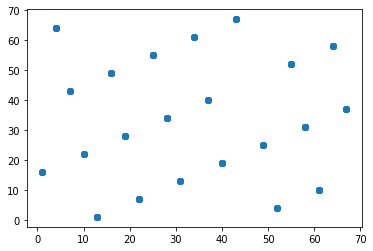

In [20]:
# A simple pseudo-random number generator
# x = x // 10 + 7 * (x % 10)
# This is a chaotic function.
# It is different from other functions in that it feeds the result back into the function.
# It has some attributes of a deterministic function and some of a random system.

def rand2(seed=12):
    while True:
        seed = seed // 10 + 7 * (seed % 10)
        yield seed

rand2 = rand2(seed=49)
x_values = [next(rand2) for i in range(100)]
y_values = [next(rand2) for i in range(100)]

plt.scatter(x_values, y_values)

## Pseudo-Random Numbers

In [21]:
# A list of n random numbers - again we are turning a "generator" into a list
n = 10
[random.random() for i in range(n)]

[0.8226924128524412,
 0.07459489106842454,
 0.539981536699935,
 0.42635012286713714,
 0.8225252585152211,
 0.06843060944899249,
 0.7659060980857473,
 0.8356786098701868,
 0.90013542915959,
 0.8920911124396236]

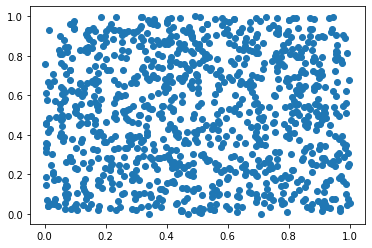

In [25]:
# Scatter plot of random (x,y) coordinates
n = 1000
fig, ax = plt.subplots()
ax.scatter([random.random() for i in range(n)], [random.random() for i in range(n)])
ax

## Chaotic Feedback

 * some mathematical functions produce chaotic patterns when you feed their output back in as the next input.

In [28]:
# Returning to our simple pseudo-random number generator from above

import time

class TwoDigitRand:
    """ Demonstrates 'chaotic feedback' algorithm - not crypographic quality randomness!! """
    def __init__(self, seed=None):
        seed = seed or int(time.time()*10**3)  # clock time in milliseconds
        self.seed = seed % 100  # 2-digit only!

    def rand(self):
        """ Chaotic feedback algorithm - the last output is used as input to compute the next one """
        self.seed = self.seed//10 + 7*(self.seed%10)
        return self.seed


r = TwoDigitRand()
[r.rand() for i in range(20)]

[25, 37, 52, 19, 64, 34, 31, 10, 1, 7, 49, 67, 55, 40, 4, 28, 58, 61, 13, 22]

Sequence seed: 62


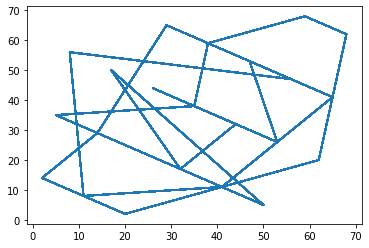

In [27]:
# Scatter plot of (seed, rand(seed))
fig, ax = plt.subplots()
print("Sequence seed:", r.seed)
pairs = [(r.seed, r.rand()) for i in range(n)]
ax.plot([x for x,y in pairs], [y for x,y in pairs])
ax

## Example: computational experiment with random numbers

We'll use the Histogram class developed last week to count the outcomes of the experiment

In [29]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel=None):
        fig, ax = plt.subplots()
        ax.set_title(title)
        if xlabel:
            ax.set_xlabel(xlabel)
        ax.set_ylabel('Count')
        self.ax = ax
        self.fig = fig
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

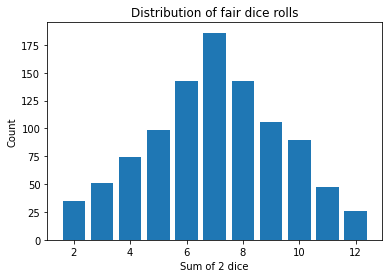

In [42]:
# Experiment: Roll some dice
def roll_dice(sides=6):
    return (random.randint(1,sides), random.randint(1,sides))

# Number rolls to use in this experiment
n_rolls = 1000

rolls = Histogram("Distribution of fair dice rolls", xlabel='Sum of 2 dice')
for i in range(n_rolls):
    rolls.count(sum(roll_dice()))

rolls.plot()